<a href="https://colab.research.google.com/github/Jeongmin0658/kentech_tutorial/blob/main/Version_2023_summer/suhyun/3_distributing%20points%20share.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part III. Distributing points

# 1 - Distribution of random points in 1D

[-137.85030557   39.94349692 -185.19789509 -170.3403833  -149.59372129
  159.38233177  -62.19516183  -36.04912783  101.86445184   25.69397752
  -44.7911161   173.80773779 -158.57021265  -11.48773705  167.2032877
   -4.00936385  180.86668908  -21.2644785  -145.10188478  159.26521849
 -139.19204678 -171.38587447  -13.76939577 -185.86900862 -146.69692823
   89.71850272  -36.58999684  -53.78674583  -20.25398129  -75.76836436
    7.47447608 -186.72281978  -57.8622314    54.18039018   92.6871152
   67.3442303   -58.37159279  102.59003767   52.61350726  160.11559769
  133.31532431 -163.68080905   13.4381934   123.52886569 -148.21543059
   -7.98279902  131.59068241  -19.55407766   34.71005791  127.2266407
  -16.11945013   91.96936653   32.59419776   70.21878868   59.50234556
    4.22681024   93.14308149  159.99606556 -178.85037453  160.89212149
  -96.33020693  164.45877478   -7.46269863   95.21659777  197.79892856
  -92.81627475  -63.52000767   27.17543885  -42.93180955 -115.62235823
   14.372

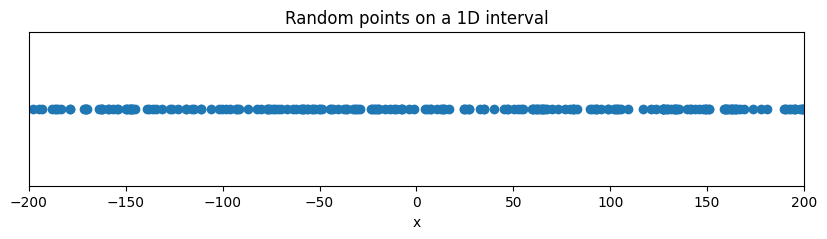

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_points(lower_bound, upper_bound, num_points):
    return np.random.uniform(lower_bound, upper_bound, num_points)

# Test the function
# Feed in your numbers
lower_bound = -200  # Lower bound of the interval
upper_bound = 200 # Upper bound of the interval
num_points = 232  # Number of random points to generate
random_points = generate_random_points(lower_bound, upper_bound, num_points)

# print the random points
print(random_points)

# plot the points
plt.figure(figsize=(10, 2))
plt.scatter(random_points, np.zeros_like(random_points), marker='o')
plt.xlim([lower_bound, upper_bound])
plt.yticks([])  # Hide the y-axis
plt.xlabel('x')
plt.title('Random points on a 1D interval')
plt.show()


# 2 - Distributing random points in 2D

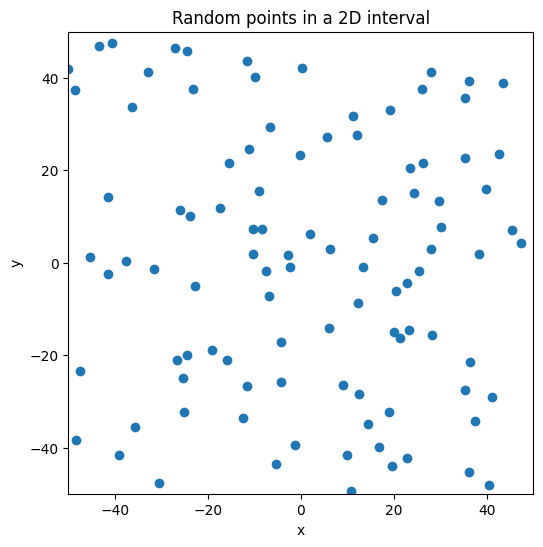

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def generate_random_points_2D(x_bounds, y_bounds, num_points):
    # Make your own function
    x_coords = generate_random_points(x_bounds[0], x_bounds[1], num_points)
    y_coords = generate_random_points(y_bounds[0], y_bounds[1], num_points)

    return x_coords, y_coords

# Test the function
# Here is the example of the bounds
x_bounds = [-50, 50]  # Bounds for the x-coordinates
y_bounds = [-50, 50]  # Bounds for the y-coordinates
num_points = 100  # Number of random points to generate

# Call the function
x_coords, y_coords = generate_random_points_2D(x_bounds, y_bounds, num_points)


# Plot the points
plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, marker='o')
plt.xlim(x_bounds)
plt.ylim(y_bounds)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random points in a 2D interval')
plt.show()

# 3 - Find pairs of points with an overlap

Below is an example where some of points overlap (within a certain distance). You will write a function to find those pairs.

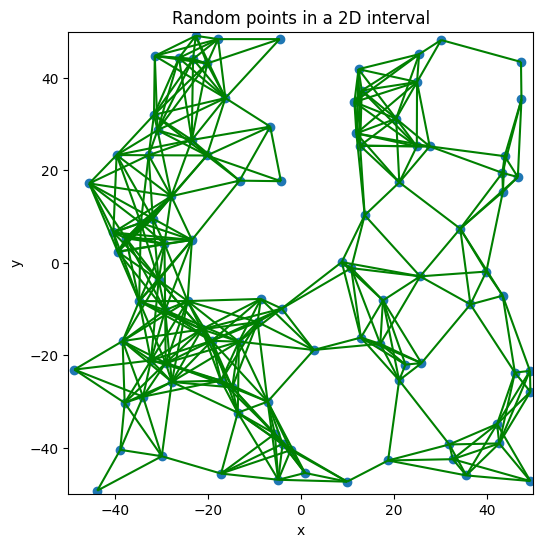

In [55]:
import math
from matplotlib import collections

def find_overlab_pairs(x_coords, y_coords, overlab_distance):
  overlab_pairs = []
  num_points = len(x_coords)

  for idx1 in range(0,num_points):
    x1 = x_coords[idx1]
    y1 = y_coords[idx1]

    for idx2 in range(idx1 + 1, num_points):
      x2 = x_coords[idx2]
      y2 = y_coords[idx2]

      dis = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

      if(dis <= overlab_distance):
        overlab_pairs.append([(x1, y1), (x2, y2)])

  return overlab_pairs

overlab_distance = 18
overlab_pairs = find_overlab_pairs(x_coords, y_coords, overlab_distance)

lines = collections.LineCollection(overlab_pairs, color="green")

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, marker='o')
plt.gca().add_collection(lines)
plt.xlim(x_bounds)
plt.ylim(y_bounds)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random points in a 2D interval')
plt.show()

# 4 - Generating random points without overlaps

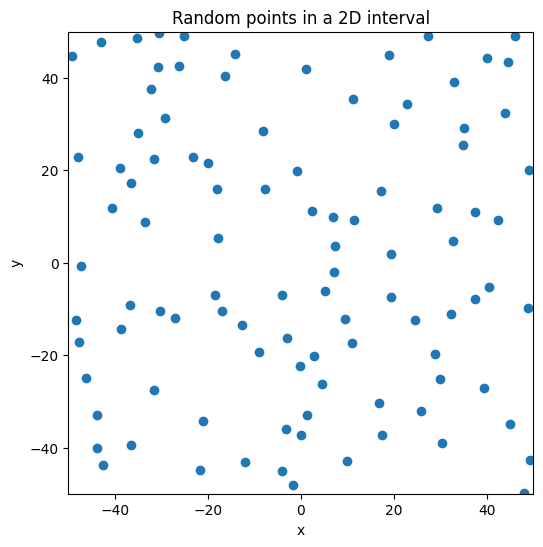

In [62]:
def generate_random_points_2D_no_overlab(x_bounds, y_bounds, num_points, overlab_distance):
    # Make your own function
    x_coords = []
    y_coords = []

    while num_points:
      x = np.random.uniform(x_bounds[0], x_bounds[1])
      y = np.random.uniform(y_bounds[0], y_bounds[1])

      x_coords.append(x)
      y_coords.append(y)

      overlab_pairs = find_overlab_pairs(x_coords, y_coords, overlab_distance)
      if overlab_pairs:
        del x_coords[-1]
        del y_coords[-1]
      else:
        num_points -= 1

    return x_coords, y_coords

overlab_distance = 3
x_coords, y_coords = generate_random_points_2D_no_overlab(x_bounds, y_bounds, num_points, overlab_distance)

overlab_pairs = find_overlab_pairs(x_coords, y_coords, overlab_distance)
lines = collections.LineCollection(overlab_pairs, color="red")

plt.figure(figsize=(6, 6))
plt.scatter(x_coords, y_coords, marker='o')
plt.gca().add_collection(lines)
plt.xlim(x_bounds)
plt.ylim(y_bounds)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random points in a 2D interval')
plt.show()